# Keras Syntax Basics

##### With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
tf.__version__

'2.0.0'

 Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [3]:
import pandas as pd
data = pd.read_csv('fake_reg.csv')
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

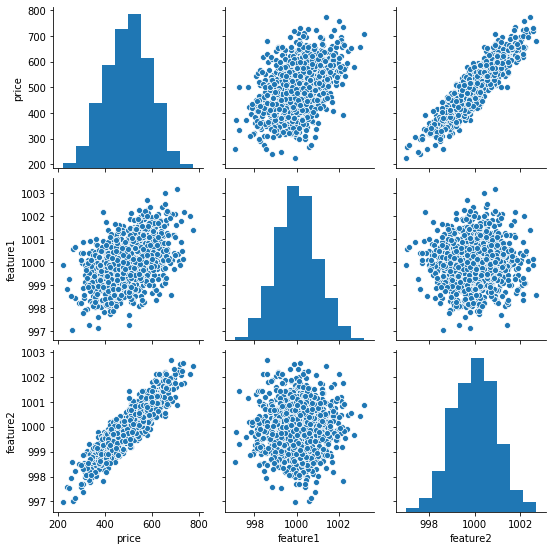

In [5]:
sns.pairplot(data)

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = data[['feature1', 'feature2']].values
#X

In [8]:
#Label
y = data['price'].values
#y

In [9]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [13]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
#help(MinMaxScaler)

In [16]:
scaler = MinMaxScaler()

In [17]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#X_train

In [20]:
#X_test

# TensorFlow 2.0 Syntax

## Import Options
There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). I will use the method shown in the official TF documentation.

In [21]:
#help(Sequential)

### Creating a Model
There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's see both methods (its up to you to choose which method you prefer).

In [22]:
# Model lits of layers
model = Sequential([
                Dense(units=2),
                Dense(units=2),
                Dense(units=2)
])

In [23]:
# Model - adding in layers one by one
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

# Final output node for prediction, here we do not require activation function
model.add(Dense(units=1))

# For Regression Loss Function will be mse (Mean Squared Error)
model.compile(optimizer='rmsprop', loss='mse') 

Choosing an optimizer and loss
Keep in mind what kind of problem you are trying to solve:

### For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

### Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [24]:
model.fit(X_train, y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256720.8414
Epoch 2/250
700/700 [==============================] - 0s 63us/sample - loss: 256677.5178
Epoch 3/250
700/700 [==============================] - 0s 55us/sample - loss: 256633.3625
Epoch 4/250
700/700 [==============================] - 0s 54us/sample - loss: 256584.3800
Epoch 5/250
700/700 [==============================] - 0s 54us/sample - loss: 256530.8459
Epoch 6/250
700/700 [==============================] - 0s 52us/sample - loss: 256471.6009
Epoch 7/250
700/700 [==============================] - 0s 54us/sample - loss: 256404.2946
Epoch 8/250
700/700 [==============================] - 0s 53us/sample - loss: 256326.0477
Epoch 9/250
700/700 [==============================] - 0s 54us/sample - loss: 256234.8562
Epoch 10/250
700/700 [==============================] - 0s 55us/sample - loss: 256129.6603
Epoch 11/250
700/700 [==============================] - 0s 53us/sample - loss: 

700/700 [==============================] - 0s 51us/sample - loss: 36988.8254
Epoch 92/250
700/700 [==============================] - 0s 52us/sample - loss: 32536.3702
Epoch 93/250
700/700 [==============================] - 0s 50us/sample - loss: 28279.0479
Epoch 94/250
700/700 [==============================] - 0s 49us/sample - loss: 24222.8482
Epoch 95/250
700/700 [==============================] - 0s 53us/sample - loss: 20436.7523
Epoch 96/250
700/700 [==============================] - 0s 51us/sample - loss: 16974.4212
Epoch 97/250
700/700 [==============================] - 0s 50us/sample - loss: 13748.4109
Epoch 98/250
700/700 [==============================] - 0s 51us/sample - loss: 10896.7802
Epoch 99/250
700/700 [==============================] - 0s 50us/sample - loss: 8395.1577
Epoch 100/250
700/700 [==============================] - 0s 50us/sample - loss: 6282.4426
Epoch 101/250
700/700 [==============================] - 0s 51us/sample - loss: 4558.4672
Epoch 102/250
700/700 [=

700/700 [==============================] - 0s 52us/sample - loss: 244.1459
Epoch 183/250
700/700 [==============================] - 0s 52us/sample - loss: 233.2840
Epoch 184/250
700/700 [==============================] - 0s 50us/sample - loss: 221.9854
Epoch 185/250
700/700 [==============================] - 0s 51us/sample - loss: 211.0096
Epoch 186/250
700/700 [==============================] - 0s 52us/sample - loss: 201.1676
Epoch 187/250
700/700 [==============================] - 0s 51us/sample - loss: 191.9560
Epoch 188/250
700/700 [==============================] - 0s 53us/sample - loss: 183.2754
Epoch 189/250
700/700 [==============================] - 0s 51us/sample - loss: 174.5441
Epoch 190/250
700/700 [==============================] - 0s 51us/sample - loss: 165.1967
Epoch 191/250
700/700 [==============================] - 0s 51us/sample - loss: 156.1761
Epoch 192/250
700/700 [==============================] - 0s 50us/sample - loss: 146.9994
Epoch 193/250
700/700 [============

In [25]:
#model.history.history

In [26]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss
0,256720.841429
1,256677.517768
2,256633.362500
3,256584.380000
4,256530.845893


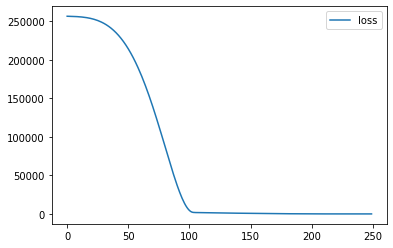

In [27]:
loss_df.plot()

In [28]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

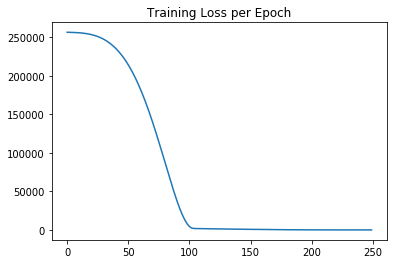

In [29]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch")

### Compare final evaluation (MSE) on training set and test set.
These should hopefully be fairly close to each other.

In [30]:
model.metrics_names

['loss']

In [31]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [32]:
training_score

23.931196038382392

In [33]:
test_score

25.721388549804686

### Further Evaluations

In [34]:
test_predictions = model.predict(X_test)
#test_predictions

In [35]:
pred_df = pd.DataFrame(y_test, columns=['Test_Y'])
pred_df.head()

,Test_Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [36]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      406.029907
1      624.294556
2      592.841064
3      573.077026
4      367.544220
          ...    
295    529.878296
296    516.389404
297    610.384094
298    417.606628
299    411.689148
Length: 300, dtype: float32

In [37]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)
pred_df.columns = ['Test_Y', 'Predicted_Y']
#pred_df

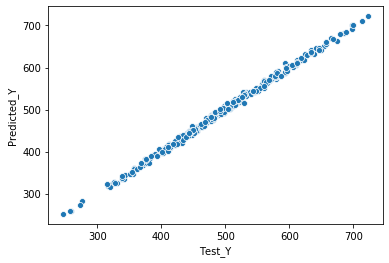

In [38]:
sns.scatterplot(x='Test_Y', y='Predicted_Y', data=pred_df)

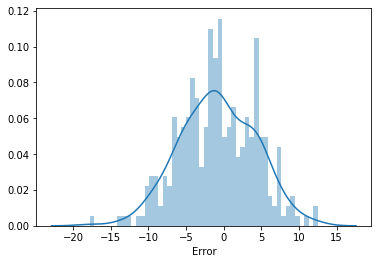

In [40]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Predicted_Y']
sns.distplot(pred_df['Error'], bins=50)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
mean_squared_error(pred_df['Test_Y'], pred_df['Predicted_Y'])

25.721391299793638

In [46]:
mean_absolute_error(pred_df['Test_Y'], pred_df['Predicted_Y'])

4.098908522293039

In [48]:
# Essentially the same thing, difference just due to precision
test_score

25.721388549804686

In [49]:
#RMSE --> Root Mean Squared Error
test_score ** 0.5

5.071625829041875

## Predicting on brand new data
What if we just saw a brand new gemstone from the ground? What should we price it at? This is the exact same procedure as predicting on a new test data!

In [53]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [54]:
model.predict(new_gem)

array([[420.60446]], dtype=float32)

## Saving and Loading a Model

In [55]:
from tensorflow.keras.models import load_model

In [57]:
model.save('new_gem.h5') # creates a HDF5 file 'my_model.h5' --> https://www.h5py.org/

In [58]:
later_load_model = load_model('new_gem.h5')

In [59]:
later_load_model.predict(new_gem)

array([[420.60446]], dtype=float32)